In [1]:
import csv
import re

In [2]:
import matplotlib.pyplot as plt

In [3]:
hsap_fe = dict()
ptro_fe = dict()

In [4]:
for name in ["homo_sapiens", "pan_troglodytes"]:
    with open(f"data/ref/{name}/annot/out/meta_exon.csv", 'r') as f:
        reader = csv.reader(f)
        next(reader)

        for row in reader:
            gene, gene_func, chrom, meta_beg, meta_end, strand, meta_type, make_up = row

            if meta_type != "FE":
                continue

            ss_set = set()

            for exon in make_up.split(","):
                exon_type, beg, end = re.split('[=-]', exon)

                if strand == "+":
                    ss_set.add(end)
                else:
                    ss_set.add(beg)

            strand = int(strand == "+")
            meta_exon = f"{chrom}:{meta_beg}-{meta_end}:{strand}"

            if name == "homo_sapiens":
                hsap_fe[meta_exon] = len(ss_set)
            else:
                ptro_fe[meta_exon] = len(ss_set)

In [5]:
data = {
    'hsap>ptro': 0,
    'hsap<ptro': 0,
    'hsap=ptro': 0
}

In [6]:
with open("../data/homology/exons/exons.csv", 'r') as f:
    reader = csv.DictReader(f)
    next(reader)

    for row in reader:
        hsap = row['hsap_exon']
        ptro = row['pan_troglodytes']

        if ptro == "-":
            continue

        _, hsap = hsap.split("=")
        _, ptro = ptro.split("=")

        if hsap in hsap_fe and ptro in ptro_fe:
            hsap_no = hsap_fe[hsap]
            ptro_no = ptro_fe[ptro]

            if hsap_no > ptro_no:
                data['hsap>ptro'] += 1
                continue

            if hsap_no < ptro_no:
                data['hsap<ptro'] += 1
                continue

            if hsap_no == ptro_no:
                data['hsap=ptro'] += 1
                continue

In [7]:
ys = list()
xs = list()

In [8]:
t = sum(data.values())

In [9]:
for cat, count in data.items():
    x = count / t

    xs.append(x)
    ys.append(cat)

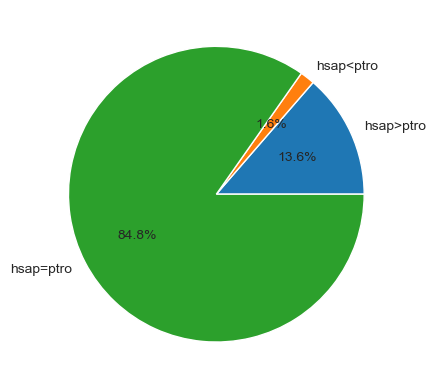

In [10]:
_ = plt.pie(xs, labels=ys, autopct='%1.1f%%')